In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail', engine='openpyxl')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


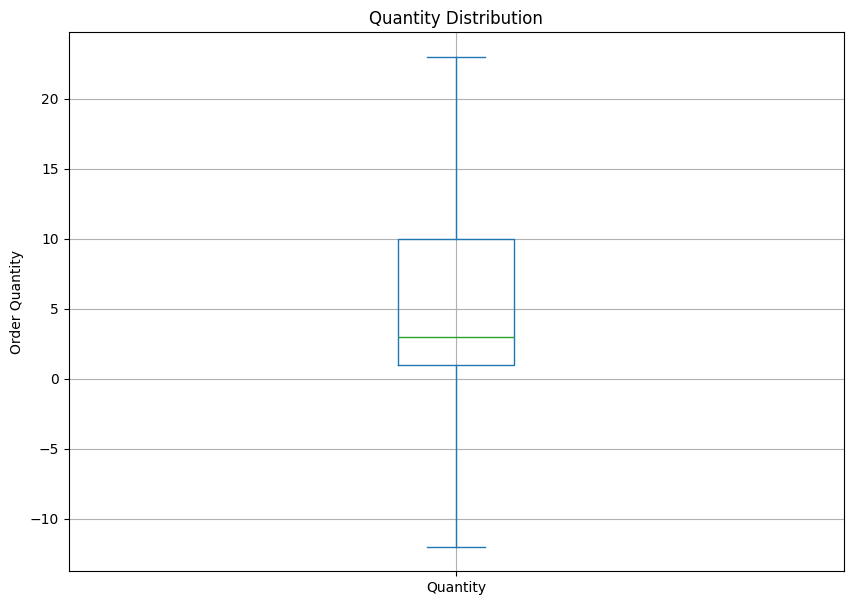

In [ ]:
ax = df['Quantity'].plot.box(
    showfliers=False,
    grid=True,
    figsize=(10, 7)
)

ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')

plt.suptitle("")
plt.show()

###The box plot shows a widely spread order quantity distribution with possible skewness and negative values, indicating potential data irregularities.








In [ ]:
df.loc[df['Quantity'] > 0].shape


(531285, 8)

In [ ]:
df.shape


(541909, 8)

In [ ]:
df = df.loc[df['Quantity'] > 0]


In [ ]:
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()


<ipython-input-14-bf723be91d99>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()


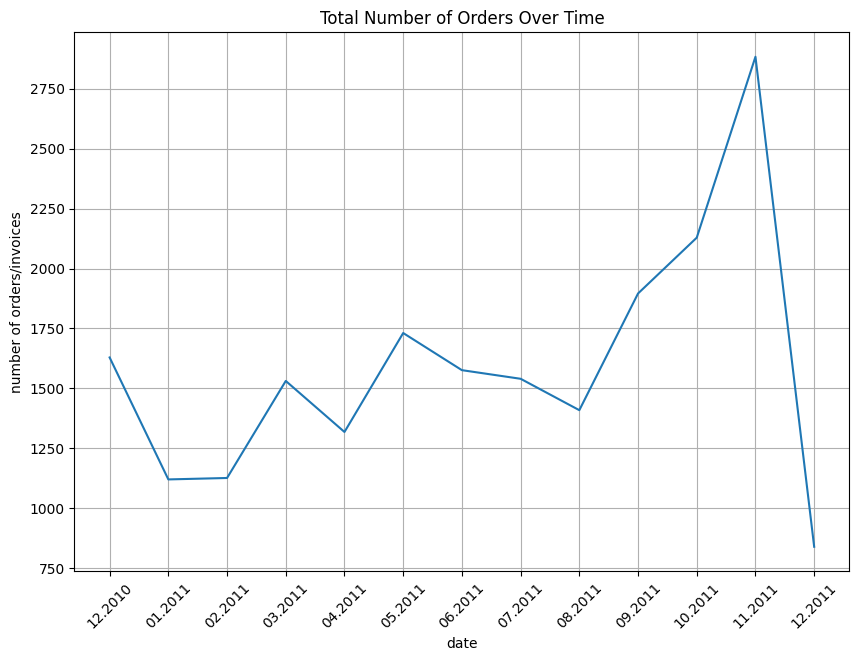

In [ ]:
ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(
    range(len(monthly_orders_df.index)),
    [x.strftime('%m.%Y') for x in monthly_orders_df.index],
    rotation=45
)

plt.show()



> The number of orders fluctuates over time, with a sharp peak in November 2011 followed by a sudden decline in December 2011.




In [ ]:
invoice_dates = df.loc[
    df['InvoiceDate'] >= '2011-12-01',
    'InvoiceDate'
]

In [ ]:
print('Min date: %s\nMax date: %s' % (invoice_dates.min(), invoice_dates.max()))
df.loc[df['InvoiceDate'] < '2011-12-01'].shape
df = df.loc[df['InvoiceDate'] < '2011-12-01']
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()
monthly_orders_df

Min date: 2011-12-01 08:33:00
Max date: 2011-12-09 12:50:00


<ipython-input-17-ce1aa33e59c4>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()


,InvoiceNo
InvoiceDate,
2010-12-31,1629
2011-01-31,1120
2011-02-28,1126
2011-03-31,1531
2011-04-30,1318
2011-05-31,1731
2011-06-30,1576
2011-07-31,1540
2011-08-31,1409


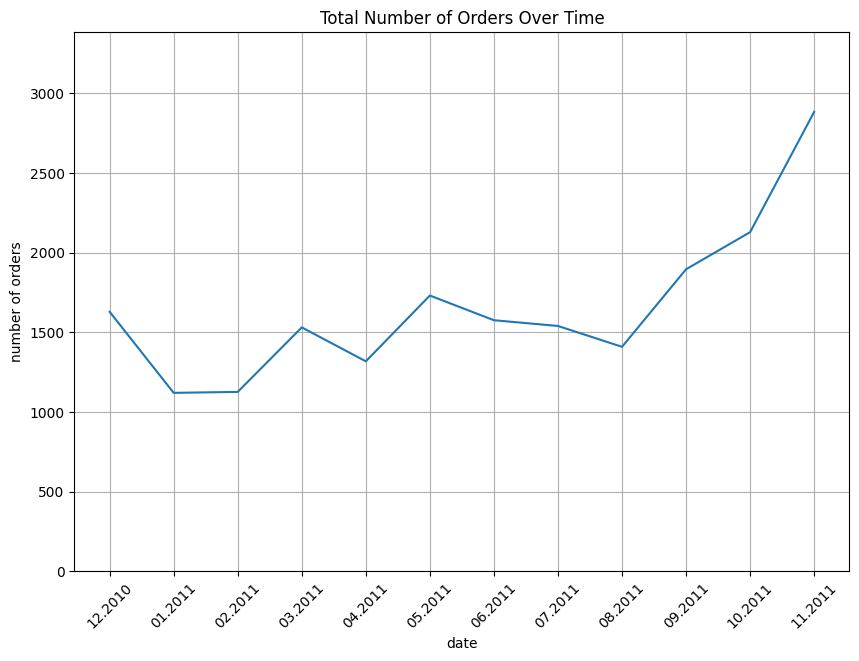

In [ ]:
ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders')
ax.set_title('Total Number of Orders Over Time')

ax.set_ylim([0, max(monthly_orders_df.values)+500])

plt.xticks(
    range(len(monthly_orders_df.index)),
    [x.strftime('%m.%Y') for x in monthly_orders_df.index],
    rotation=45
)

plt.show()



> The total number of orders fluctuated over time but showed a significant upward trend from mid-2011, peaking in November 2011.





In [ ]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
monthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()
monthly_revenue_df

<ipython-input-19-00eb6a7ba7fa>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()


,Sales
InvoiceDate,
2010-12-31,823746.140
2011-01-31,691364.560
2011-02-28,523631.890
2011-03-31,717639.360
2011-04-30,537808.621
2011-05-31,770536.020
2011-06-30,761739.900
2011-07-31,719221.191
2011-08-31,737014.260


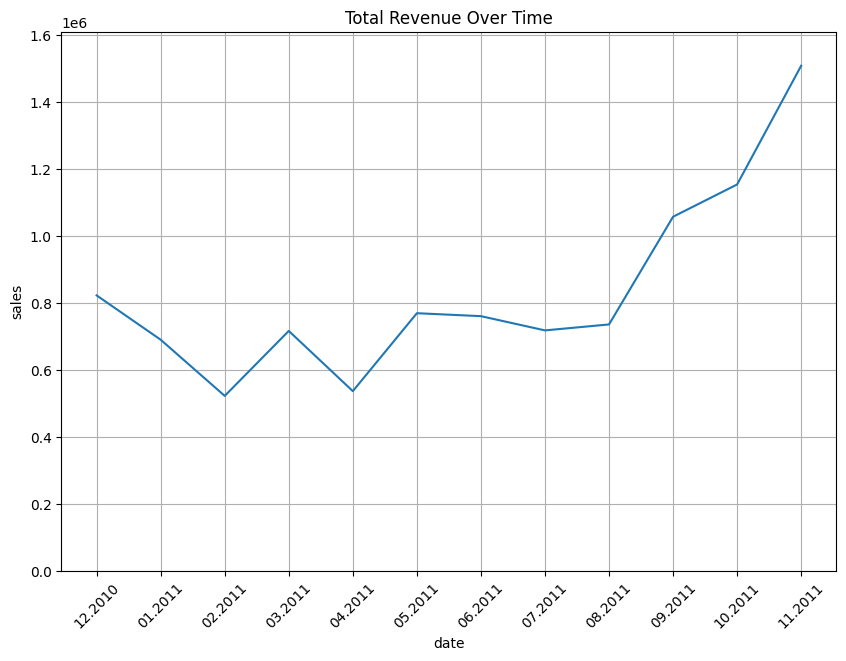

In [ ]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue Over Time')

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

plt.xticks(
    range(len(monthly_revenue_df.index)),
    [x.strftime('%m.%Y') for x in monthly_revenue_df.index],
    rotation=45
)

plt.show()



> The graph shows fluctuating monthly revenue with a significant upward trend from September to November 2011, peaking at approximately 1.5 million in November.






In [ ]:
invoice_customer_df = df.groupby(
    by=['InvoiceNo', 'InvoiceDate']
).agg({
    'Sales': sum,
    'CustomerID': max,
    'Country': max,
}).reset_index()

<ipython-input-21-45163e1be7e5>:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ).agg({
<ipython-input-21-45163e1be7e5>:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ).agg({


In [ ]:
monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

<ipython-input-22-4bc95d9ceb68>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(freq='M'), 'CustomerID'
<ipython-input-22-4bc95d9ceb68>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']


In [ ]:
monthly_repeat_customers_df


,CustomerID
InvoiceDate,
2010-12-31,263
2011-01-31,153
2011-02-28,153
2011-03-31,203
2011-04-30,170
2011-05-31,281
2011-06-30,220
2011-07-31,227
2011-08-31,198


In [ ]:
monthly_unique_customers_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
monthly_unique_customers_df

<ipython-input-24-0bbb8a422317>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_unique_customers_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()


,CustomerID
InvoiceDate,
2010-12-31,885
2011-01-31,741
2011-02-28,758
2011-03-31,974
2011-04-30,856
2011-05-31,1056
2011-06-30,991
2011-07-31,949
2011-08-31,935


In [ ]:
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df*100.0
monthly_repeat_percentage

,CustomerID
InvoiceDate,
2010-12-31,29.717514
2011-01-31,20.647773
2011-02-28,20.184697
2011-03-31,20.841889
2011-04-30,19.859813
2011-05-31,26.609848
2011-06-30,22.199798
2011-07-31,23.919916
2011-08-31,21.176471


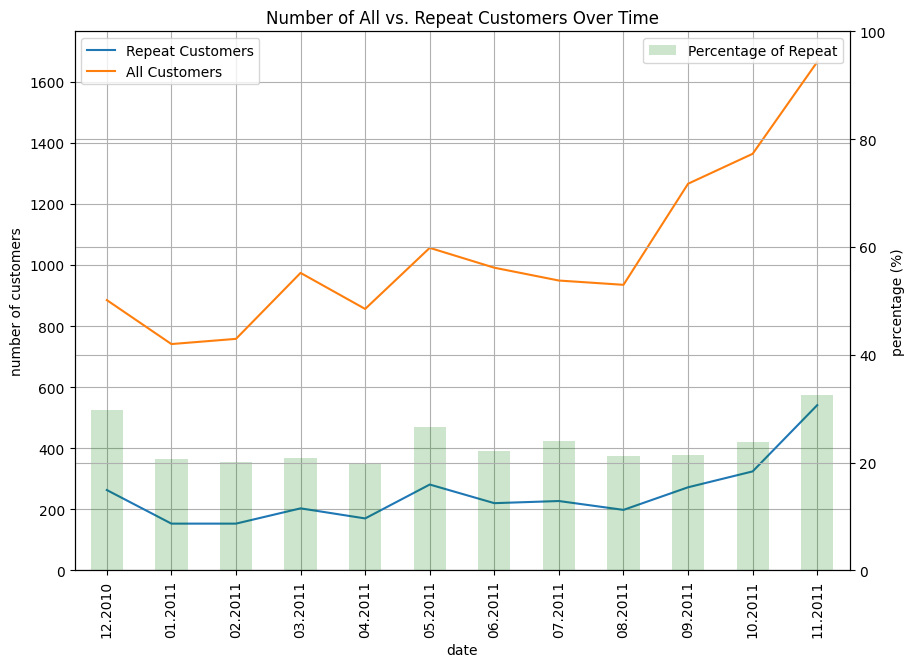

In [ ]:
ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(
    figsize=(10,7)
)

pd.DataFrame(monthly_unique_customers_df.values).plot(
    ax=ax,
    grid=True
)


ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(
    ax=ax,
    grid=True,
    secondary_y=True,
    color='green',
    alpha=0.2
)

ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(
    range(len(monthly_repeat_customers_df.index)),
    [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index],
    rotation=45
)

plt.show()



> The number of total and repeat customers steadily increased over time, with a sharp rise in late 2011, while the repeat customer percentage remained relatively stable around 20-30%.



In [ ]:
monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']
monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df/monthly_revenue_df * 100.0
monthly_rev_repeat_customers_df

<ipython-input-27-d86af3ce648d>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(freq='M'), 'CustomerID'
<ipython-input-27-d86af3ce648d>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ]).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']


,Sales
InvoiceDate,
2010-12-31,359170.60
2011-01-31,222124.00
2011-02-28,191229.37
2011-03-31,267390.48
2011-04-30,195474.18
2011-05-31,378197.04
2011-06-30,376307.26
2011-07-31,317475.00
2011-08-31,317134.25


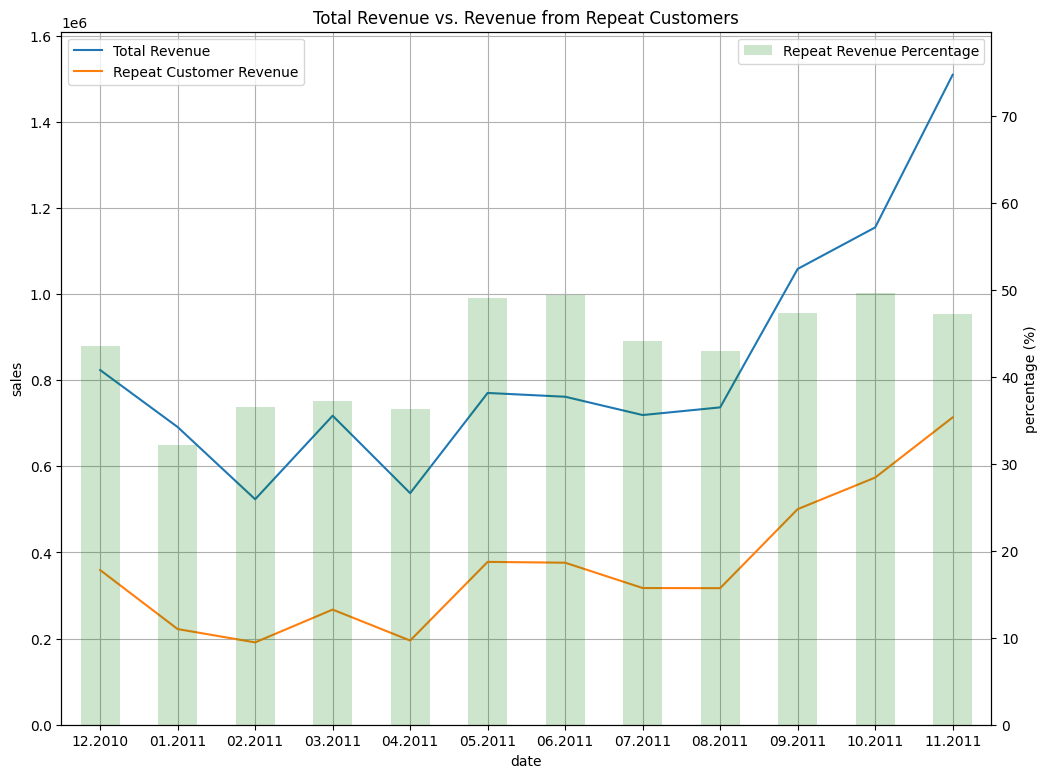

In [ ]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,9))

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(
    ax=ax,
    grid=True,
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(
    ax=ax2,
    kind='bar',
    color='g',
    alpha=0.2
)

ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([
    x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index
])

plt.show()



> The chart shows a general increase in both total revenue and revenue from repeat customers, with fluctuations in the percentage contribution from repeat customers, indicating varying levels of customer loyalty over time.



In [ ]:
date_item_df = pd.DataFrame(
    df.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)
date_item_df

<ipython-input-29-802694b2b05e>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(freq='M'), 'StockCode'


Quantity
InvoiceDate StockCode          
2010-12-31  10002           251
            10120            16
            10125           154
            10133           130
            10135           411
...                         ...
2011-11-30  C2              173
            DCGSSGIRL         1
            DOT              47
            M              3894
            POST           1262

[31701 rows x 1 columns]

In [ ]:
# Rank items by the last month sales
last_month_sorted_df = date_item_df.loc['2011-11-30'].sort_values(
    by='Quantity', ascending=False
).reset_index()

last_month_sorted_df

,StockCode,Quantity
0,23084,14954
1,84826,12551
2,22197,12460
3,22086,7908
4,85099B,5909
...,...,...
2941,84549,1
2942,84527,1
2943,90082B,1
2944,90082D,1


In [ ]:
# Regroup for top 5 items
date_item_df = pd.DataFrame(
    df.loc[
        df['StockCode'].isin([23084, 84826, 22197, 22086, '85099B'])
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)
date_item_df

<ipython-input-31-ffdca6f50e34>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(freq='M'), 'StockCode'


Quantity
InvoiceDate StockCode          
2010-12-31  22086          2460
            22197          2738
            84826           366
            85099B         2152
2011-01-31  22086            24
            22197          1824
            84826           480
            85099B         2747
2011-02-28  22086             5
            22197          2666
            84826            66
            85099B         3080
2011-03-31  22086            87
            22197          2803
            84826            60
            85099B         5282
2011-04-30  22086            13
            22197          1869
            84826             1
            85099B         2456
2011-05-31  22086            17
            22197          6849
            23084          1131
            85099B         3621
2011-06-30  22086           344
            22197          2095
            23084          1713
            84826             4
            85099B         3682
2011-07-31  22086           383
            22197          1876
            23084           318
            84826             2
            85099B         3129
2011-08-31  22086           490
            22197          5421
            23084          2267
            84826            72
            85099B         5502
2011-09-30  22086          2106
            22197          4196
            23084           680
            85099B         4401
2011-10-31  22086          3429
            22197          5907
            23084          6348
            84826            11
            85099B         5412
2011-11-30  22086          7908
            22197         12460
            23084         14954
            84826         12551
            85099B         5909

In [ ]:
trending_itmes_df = date_item_df.reset_index().pivot(index='InvoiceDate', columns='StockCode', values='Quantity').fillna(0)

trending_itmes_df = trending_itmes_df.reset_index()
trending_itmes_df = trending_itmes_df.set_index('InvoiceDate')
# The columns are not multi-indexed, so droplevel is not needed.
# trending_itmes_df.columns = trending_itmes_df.columns.droplevel(0)

# If your columns were MultiIndex and you want to remove the first level:
# trending_itmes_df.columns = trending_itmes_df.columns.droplevel(0)

# If you want to rename the columns (e.g., to remove 'Quantity' if it's there):
trending_itmes_df.columns = [col for col in trending_itmes_df.columns] # or any other renaming logic

trending_itmes_df

,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,2460.0,2738.0,0.0,366.0,2152.0
2011-01-31,24.0,1824.0,0.0,480.0,2747.0
2011-02-28,5.0,2666.0,0.0,66.0,3080.0
2011-03-31,87.0,2803.0,0.0,60.0,5282.0
2011-04-30,13.0,1869.0,0.0,1.0,2456.0
2011-05-31,17.0,6849.0,1131.0,0.0,3621.0
2011-06-30,344.0,2095.0,1713.0,4.0,3682.0
2011-07-31,383.0,1876.0,318.0,2.0,3129.0
2011-08-31,490.0,5421.0,2267.0,72.0,5502.0


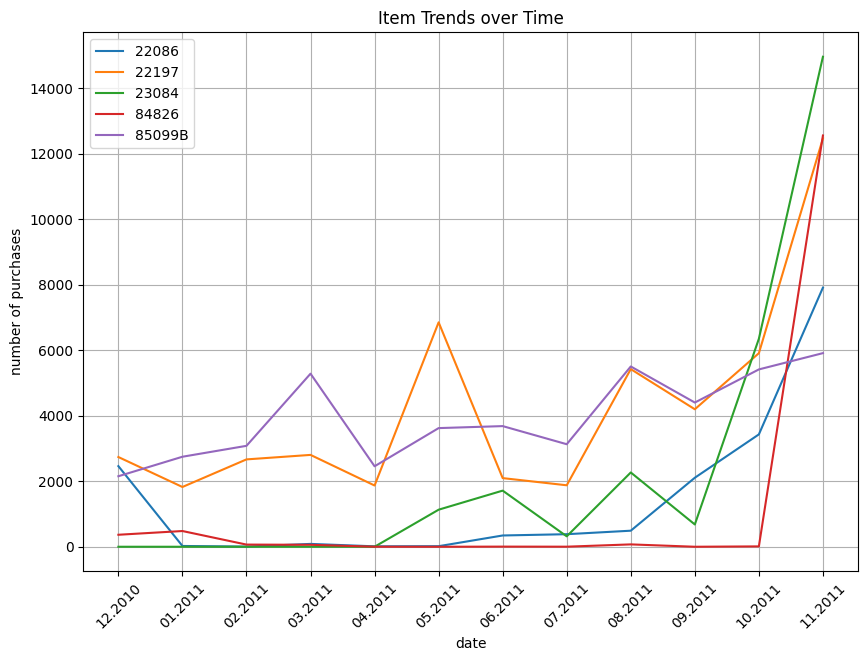

In [ ]:
ax = pd.DataFrame(trending_itmes_df.values).plot(
    figsize=(10,7),
    grid=True,
)

ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')

ax.legend(trending_itmes_df.columns, loc='upper left')

plt.xticks(
    range(len(trending_itmes_df.index)),
    [x.strftime('%m.%Y') for x in trending_itmes_df.index],
    rotation=45
)

plt.show()


> The graph shows varying patterns in item purchases, with certain items experiencing consistent sales, while others have sharp increases or low sales. Peaks in specific months (e.g., November for some items) may be attributed to targeted promotions or seasonal demand shifts.










In [ ]:
df = df[pd.notnull(df['CustomerID'])]


In [ ]:
df.shape
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
print('Date Range: %s ~ %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))


Date Range: 2010-12-01 08:26:00 ~ 2011-11-30 17:37:00


In [ ]:
df.loc[df['InvoiceDate'] >= '2011-12-01'].shape
df.shape
df = df.loc[df['InvoiceDate'] < '2011-12-01']


In [ ]:
df['Sales'] = df['Quantity'] * df['UnitPrice']


In [ ]:
customer_df = df.groupby('CustomerID').agg({
    'Sales': sum,
    'InvoiceNo': lambda x: x.nunique()
})

customer_df.columns = ['TotalSales', 'OrderCount']
customer_df['AvgOrderValue'] = customer_df['TotalSales']/customer_df['OrderCount']

<ipython-input-38-981f44f0c673>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  customer_df = df.groupby('CustomerID').agg({


In [ ]:
customer_df.head(15)


,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,77183.60,1,77183.600000
12347.0,4085.18,6,680.863333
12348.0,1797.24,4,449.310000
12349.0,1757.55,1,1757.550000
12350.0,334.40,1,334.400000
12352.0,2506.04,8,313.255000
12353.0,89.00,1,89.000000
12354.0,1079.40,1,1079.400000
12355.0,459.40,1,459.400000


In [ ]:
rank_df = customer_df.rank(method='first')
rank_df.head()

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,4290.0,1.0,4298.0
12347.0,3958.0,3470.0,3888.0
12348.0,3350.0,2861.0,3303.0
12349.0,3321.0,2.0,4238.0
12350.0,1241.0,3.0,2561.0


In [ ]:
normalized_df = (rank_df - rank_df.mean()) / rank_df.std()
normalized_df.head(15)


,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,1.724999,-1.731446,1.731446
12347.0,1.457445,1.064173,1.401033
12348.0,0.967466,0.573388,0.929590
12349.0,0.944096,-1.730641,1.683093
12350.0,-0.732148,-1.729835,0.331622
12352.0,1.193114,1.309162,0.169639
12353.0,-1.636352,-1.729029,-1.570269
12354.0,0.508917,-1.728223,1.612981
12355.0,-0.386422,-1.727417,0.970690


In [ ]:
from sklearn.cluster import KMeans


In [ ]:
kmeans = KMeans(n_clusters=4).fit(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])
kmeans


KMeans(n_clusters=4)

In [ ]:
kmeans.labels_
kmeans.cluster_centers_
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_
four_cluster_df.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.724999,-1.731446,1.731446,2
12347.0,1.457445,1.064173,1.401033,1
12348.0,0.967466,0.573388,0.929590,1
12349.0,0.944096,-1.730641,1.683093,2
12350.0,-0.732148,-1.729835,0.331622,2


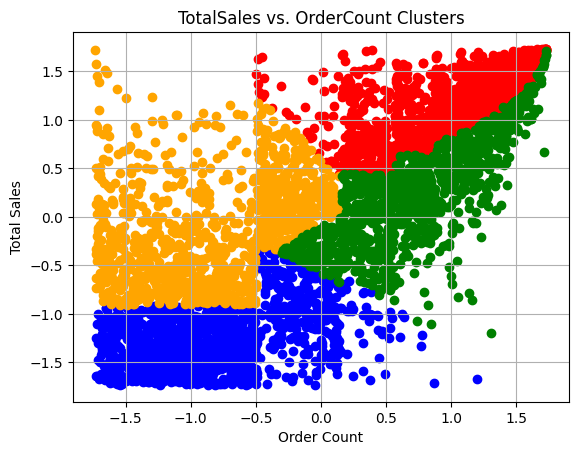

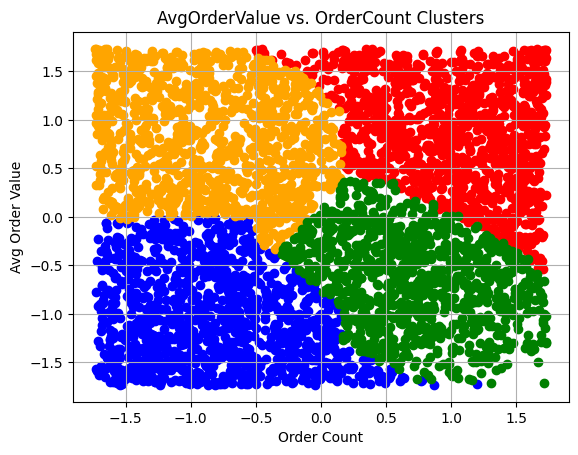

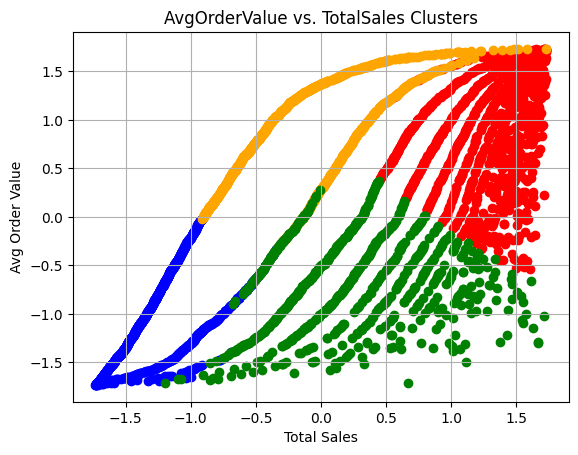

In [ ]:
four_cluster_df.groupby('Cluster').count()['TotalSales']
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
    c='green'
)

plt.title('TotalSales vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. TotalSales Clusters')
plt.xlabel('Total Sales')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()



> The first graph shows that blue customers have the lowest price and lowest order count, meaning they are the lowest bidder. On the other
hand, red customers have the highest total sales and
highest order count, indicating that they are the highest
priced customers.



> The second graph shows that blue buyers have the lowest
prices and red has the highest customer prices.


> Third graph has an average price and order compared
to the total retail price. This graph also reinforces the
previous 2 graphs in identifying the red group as the
highest value customer, blue as the lowest priced customer,
and green and orange as the high potential customers.









In [ ]:
from sklearn.metrics import silhouette_score
for n_cluster in [4,5,6,7,8]:
    kmeans = KMeans(n_clusters=n_cluster).fit(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']]
    )
    silhouette_avg = silhouette_score(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']],
        kmeans.labels_
    )

    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 4 Clusters: 0.4100
Silhouette Score for 5 Clusters: 0.3770
Silhouette Score for 6 Clusters: 0.3689
Silhouette Score for 7 Clusters: 0.3907
Silhouette Score for 8 Clusters: 0.3684


In [ ]:
kmeans = KMeans(n_clusters=4).fit(
    normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']]
)
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_
four_cluster_df.head(15)

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.724999,-1.731446,1.731446,0
12347.0,1.457445,1.064173,1.401033,2
12348.0,0.967466,0.573388,0.929590,2
12349.0,0.944096,-1.730641,1.683093,0
12350.0,-0.732148,-1.729835,0.331622,0
12352.0,1.193114,1.309162,0.169639,2
12353.0,-1.636352,-1.729029,-1.570269,1
12354.0,0.508917,-1.728223,1.612981,0
12355.0,-0.386422,-1.727417,0.970690,0


In [ ]:
high_value_cluster = four_cluster_df.loc[four_cluster_df['Cluster'] == 2]
high_value_cluster.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12347.0,1.457445,1.064173,1.401033,2
12348.0,0.967466,0.573388,0.929590,2
12352.0,1.193114,1.309162,0.169639,2
12356.0,1.268868,0.158357,1.557375,2
12359.0,1.585581,0.574194,1.672617,2


In [ ]:
customer_df.loc[high_value_cluster.index].describe()


,TotalSales,OrderCount,AvgOrderValue
count,1092.000000,1092.000000,1092.000000
mean,5719.232299,8.279304,639.804902
std,15749.764832,10.632853,777.139044
min,1000.160000,1.000000,253.895882
25%,1740.322500,3.750000,370.026500
50%,2741.340000,5.000000,456.795170
75%,4546.077500,9.000000,653.414074
max,268478.000000,192.000000,14844.766667


In [ ]:
pd.DataFrame(
    df.loc[
        df['CustomerID'].isin(high_value_cluster.index)
    ].groupby('Description').count()[
        'StockCode'
    ].sort_values(ascending=False).head()
)

,StockCode
Description,
JUMBO BAG RED RETROSPOT,1078
REGENCY CAKESTAND 3 TIER,1053
WHITE HANGING HEART T-LIGHT HOLDER,980
LUNCH BAG RED RETROSPOT,875
PARTY BUNTING,814


In [ ]:
pd.DataFrame(
    df.loc[
        df['CustomerID'].isin(
            four_cluster_df.loc[four_cluster_df['Cluster'] == 3].index
        )
    ].groupby('Description').count()[
        'StockCode'
    ].sort_values(ascending=False).head()
)

,StockCode
Description,
WHITE HANGING HEART T-LIGHT HOLDER,694
REX CASH+CARRY JUMBO SHOPPER,454
PARTY BUNTING,353
ASSORTED COLOUR BIRD ORNAMENT,348
REGENCY CAKESTAND 3 TIER,345


from matplotlib import pyplot as plt
_df_0['StockCode'].plot(kind='hist', bins=20, title='StockCode')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['StockCode'].plot(kind='line', figsize=(8, 4), title='StockCode')
plt.gca().spines[['top', 'right']].set_visible(False)